# Random Forest Regression

Objective: Prediction using Random Forest Regression  
Dataset: airfoil.dat

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('airfoil.dat', header=None, sep='\t')
print(data.shape)
data.head()

(1503, 6)


,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [2]:
data.columns = ['Frequency','AttackAngle','Chord','Velocity','Suction','SoundPressure']
data.head()

,Frequency,AttackAngle,Chord,Velocity,Suction,SoundPressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Check Null

In [3]:
data.isnull().sum()

Frequency        0
AttackAngle      0
Chord            0
Velocity         0
Suction          0
SoundPressure    0
dtype: int64

## Correlation

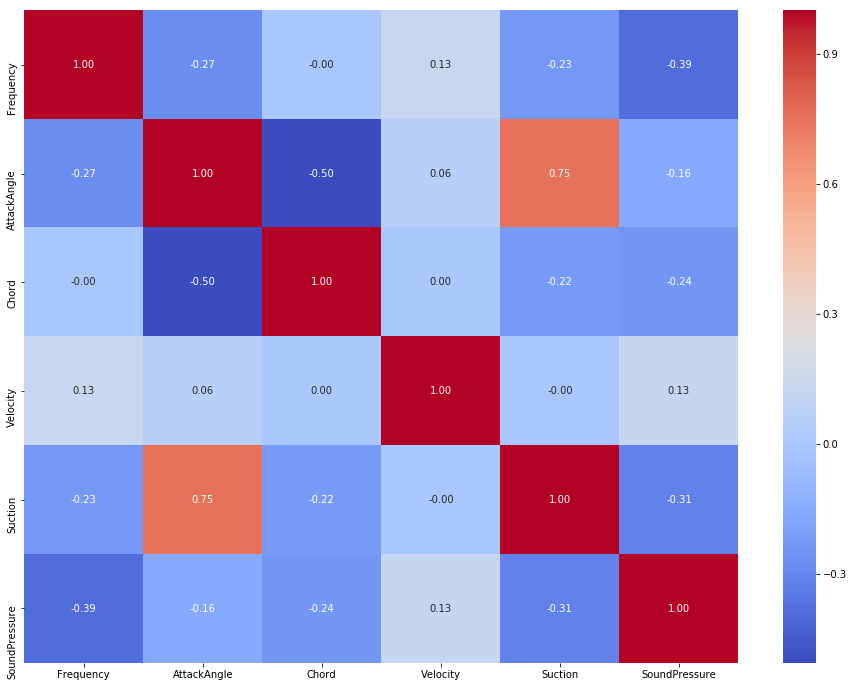

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["SoundPressure"].sort_values(ascending=False)

SoundPressure    1.000000
Velocity         0.125103
AttackAngle     -0.156108
Chord           -0.236162
Suction         -0.312670
Frequency       -0.390711
Name: SoundPressure, dtype: float64

## Data Processing and Selection

In [6]:
X = data.iloc[:, 0:5].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1503, 5)


array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03]])

In [7]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1503,)


array([126.201, 125.201, 125.951, 127.591, 127.461])

## Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1503, 5)


array([[-0.6620227 , -1.14640293,  1.79929926,  1.31293526, -0.64480461],
       [-0.59856135, -1.14640293,  1.79929926,  1.31293526, -0.64480461]])

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (1202, 5) (1202,)
X TEST Set :  (301, 5) (301,)


## Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
print("Accuracy score         :", round(regressor.score(X_test, y_test),4))

R-Square               : 0.9403
Mean Absolute Error    : 1.1585
Mean Squared Error     : 2.537
Root Mean Squared Error: 1.5928
Accuracy score         : 0.9403


## Data Prediction

In [11]:
df_pred1 = data[data.index == 0]
df_pred2 = data[data.index == 45]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Frequency,AttackAngle,Chord,Velocity,Suction,SoundPressure
0,800,0.0,0.3048,71.3,0.002663,126.201
45,8000,0.0,0.3048,39.6,0.003101,114.779


In [12]:
Xp = df_pred.iloc[:, 0:5]
Xp = scaler.transform(Xp)

yp = data.iloc[:, -1].values

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [13]:
RFR_pred = regressor.predict(Xp)
RFR_pred

array([126.43793 , 114.097975])